In [55]:
import numpy as np
import matplotlib.pyplot as plt 

import pickle
import os

plt.style.use("fivethirtyeight")

#Remove warnings 
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [56]:
# Load the model 

os.chdir(".../Image Recognition - Animals vs Transport/")

model = pickle.load(open("Animalvstransport.sav", "rb"))


Keras model archive loading:
File Name                                             Modified             Size
metadata.json                                  2023-02-18 08:38:44           64
variables.h5                                   2023-02-18 08:38:44     17533048
config.json                                    2023-02-18 08:38:44         4221
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dense_3
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
......flatten
.........vars
......max_pooling2d
.........vars
......max_pooling2d_1
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wra

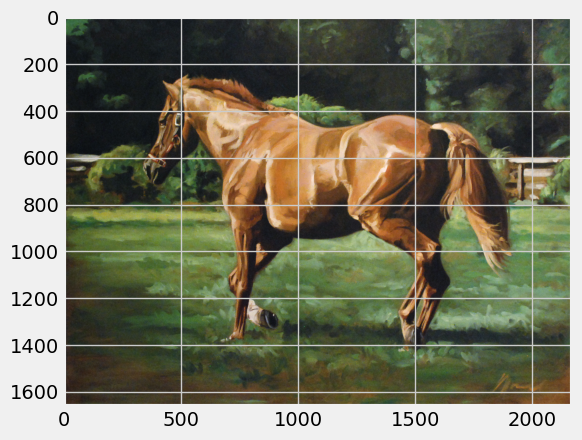

In [71]:
#Show the image

#Folder for test images
os.chdir(".../Image Recognition - Animals vs Transport/Test Images")


#change this for the name of image you want to test
new_image = plt.imread("horse3.jpg")  
img = plt.imshow(new_image)

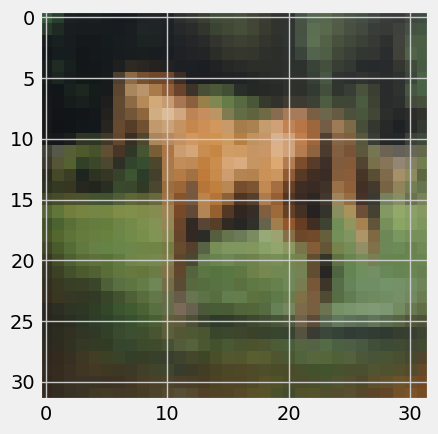

In [72]:
#Resize the image
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)


In [73]:
# Get the model predictions 
predictions = model.predict(np.array([resized_image]))

#Show the predictions 
predictions 

1/1 [==============================] - 0s 23ms/step


array([[4.8506320e-07, 3.8340396e-08, 5.7529801e-06, 1.7702656e-05,
        1.5955368e-02, 5.9908937e-04, 4.9294715e-07, 9.8342055e-01,
        1.1466419e-09, 4.2327494e-07]], dtype=float32)

In [74]:
#Sort the predictions from least to greatest 

list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions 

for i in range(10):
    for j in range(10):
        if x[0][list_index[1]] > x[0][list_index[j]]:
            temp = list_index[i]
            list_index[i] = list_index[j]
            list_index[j] = temp

In [75]:
#Show the sorted labels in order
print(list_index)

#Will print the highest probability by order

[1, 8, 2, 3, 4, 5, 6, 7, 0, 9]


In [76]:
#Get the image classification names
classification = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]



In [77]:
#Print predictions 
for i in range(10):
    print(classification[list_index[i]], ":", round(predictions[0][list_index[i]] * 100, 2), "%")


automobile : 0.0 %
ship : 0.0 %
bird : 0.0 %
cat : 0.0 %
deer : 1.6 %
dog : 0.06 %
frog : 0.0 %
horse : 98.34 %
airplane : 0.0 %
truck : 0.0 %
